In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import  DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [91]:
check = pd.read_csv("C:/Users/SHIVAM/OneDrive/Desktop/Data science Assignment/Decision Trees/Fraud_check.csv")

In [84]:
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [85]:
check.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [86]:
check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [92]:
check = pd.get_dummies(check,columns=['Marital.Status','Urban','Undergrad'],drop_first=True)

In [93]:
check['Taxable.Income'] = np.where(check['Taxable.Income'] <= 30000,'Risky','Good')

In [95]:
label_encoder = preprocessing.LabelEncoder()
check['Taxable.Income'] = label_encoder.fit_transform(check['Taxable.Income'])

In [96]:
check

,Taxable.Income,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Urban_YES,Undergrad_YES
0,0,50047,10,0,1,1,0
1,0,134075,18,0,0,1,1
2,0,160205,30,1,0,1,0
3,0,193264,15,0,1,1,1
4,0,27533,28,1,0,0,0
...,...,...,...,...,...,...,...
595,0,39492,7,0,0,1,1
596,0,55369,2,0,0,1,1
597,0,154058,0,0,0,1,0
598,0,180083,17,1,0,0,1


In [99]:
x = check.iloc[:,1:7]
y = check.iloc[:,0]

In [100]:
x

,City.Population,Work.Experience,Marital.Status_Married,Marital.Status_Single,Urban_YES,Undergrad_YES
0,50047,10,0,1,1,0
1,134075,18,0,0,1,1
2,160205,30,1,0,1,0
3,193264,15,0,1,1,1
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,0,1,1
596,55369,2,0,0,1,1
597,154058,0,0,0,1,0
598,180083,17,1,0,0,1


In [101]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [103]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

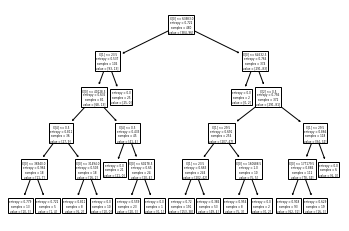

In [104]:
tree.plot_tree(model);

In [105]:
model.score(x_train,y_train)

0.8166666666666667

In [107]:
y_pred = model.predict(x_test)
np.mean(y_pred==y_test)

0.7583333333333333